<a href="https://colab.research.google.com/github/kozen88/HCV_DM23/blob/main/PCA_e_addestramento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applicazione delle tecniche di PCA su proiezioni del dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('HCV_ImputerMean.csv', delimiter=',')
print(df)

      Age   Gender   BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
0     56.0     1.0  35.0    2.0             1.0        1.0        1.0   
1     46.0     1.0  29.0    1.0             2.0        2.0        1.0   
2     57.0     1.0  33.0    2.0             2.0        2.0        2.0   
3     49.0     2.0  33.0    1.0             2.0        1.0        2.0   
4     59.0     1.0  32.0    1.0             1.0        2.0        1.0   
...    ...     ...   ...    ...             ...        ...        ...   
1380  44.0     1.0  29.0    1.0             2.0        2.0        2.0   
1381  55.0     1.0  34.0    1.0             2.0        2.0        1.0   
1382  42.0     1.0  26.0    2.0             2.0        1.0        1.0   
1383  52.0     1.0  29.0    2.0             1.0        1.0        2.0   
1384  55.0     2.0  26.0    1.0             2.0        2.0        2.0   

      Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  \
0                                  2.0        2

In [3]:
df.groupby('Baselinehistological staging').count()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading
Baselinehistological staging,,,,,,,,,,,,,,,,,,,,,
1.0,336,336,336,336,336,336,336,336,336,336,...,336,336,336,336,336,336,336,336,336,336
2.0,332,332,332,332,332,332,332,332,332,332,...,332,332,332,332,332,332,332,332,332,332
3.0,355,355,355,355,355,355,355,355,355,355,...,355,355,355,355,355,355,355,355,355,355
4.0,362,362,362,362,362,362,362,362,362,362,...,362,362,362,362,362,362,362,362,362,362


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sb
sb.set()

Effettuiamo l'esperimento di feature reduction andando a ridurre le 5 feature in una sola feature aggregata cercando si aggregare gli attributi inerenti ai test di RNA.

In [5]:
from sklearn.decomposition import PCA

# Seleziona solo le colonne contenenti i tuoi attributi (5 colonne nel tuo caso)
X_projection = df[['RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF']]

# Inizializza l'oggetto PCA e specifica il numero di componenti desiderate (1 nel tuo caso)
pca = PCA(n_components=1)

# Applica la PCA al tuo dataset
X_projection_reduced = pca.fit_transform(X_projection)

# andiiamo a creare un file excel per analizzare gli effetti della PCA
my_series_pca = pd.Series(X_projection_reduced.flatten())
# my_series_pca.to_excel("projection_RNA_pca.xlsx")
my_series_pca.describe()

count    1.385000e+03
mean    -2.151792e-11
std      3.639116e+05
min     -7.648730e+05
25%     -2.963474e+05
50%     -8.590007e+03
75%      2.996841e+05
max      7.705436e+05
dtype: float64

Ripetiamo l'esperimento di data reduction sul le feature delle transaminasi

In [6]:
# ripetiamo il processo su di un'altra proiezione che vada a prendere gli attributi delle transaminasi
X2_projection = df[['AST 1', 'ALT 1', 'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w']]
pca_2 = PCA(n_components=1)
X2_projection_reduced = pca_2.fit_transform(X2_projection)
my_series_pca2 = pd.Series(X2_projection_reduced.flatten())
# per generare i file excell da visualizzare
# my_series_pca2.to_excel("projection_trans_pca2.xlsx")
my_series_pca2.describe()

count    1.385000e+03
mean     2.093151e-15
std      2.786070e+01
min     -7.904297e+01
25%     -1.934655e+01
50%      2.150984e-01
75%      1.848205e+01
max      8.097623e+01
dtype: float64

In [7]:
df_wout_grading = df.drop('Baseline histological Grading', axis=1)
df_wout_grading

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baselinehistological staging
0,56.0,1.0,35.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,...,81.0,83.287265,83.800289,33.5,655330.0,634536.0,288194.000,398009.636364,402349.973081,2.0
1,46.0,1.0,29.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,...,113.0,57.000000,123.000000,44.0,40620.0,538635.0,637056.000,336804.000000,31085.000000,2.0
2,57.0,1.0,33.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,...,116.0,83.287265,83.800289,33.5,571148.0,661346.0,399921.828,735945.000000,558829.000000,4.0
3,49.0,2.0,33.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,...,88.0,48.000000,77.000000,33.0,1041941.0,449939.0,585688.000,744463.000000,582301.000000,3.0
4,59.0,1.0,32.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,...,120.0,94.000000,90.000000,30.0,660410.0,738756.0,3731527.000,338946.000000,242861.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,44.0,1.0,29.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,...,127.0,63.000000,44.000000,45.0,387795.0,55938.0,399921.828,398009.636364,402349.973081,4.0
1381,55.0,1.0,34.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,...,108.0,97.000000,64.000000,41.0,481378.0,152961.0,393339.000,73574.000000,236273.000000,2.0
1382,42.0,1.0,26.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,...,116.0,87.000000,39.000000,24.0,612664.0,572756.0,806109.000,343719.000000,160457.000000,2.0
1383,52.0,1.0,29.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,...,47.0,48.000000,81.000000,43.0,139872.0,76161.0,515730.000,2460.000000,696074.000000,3.0


In [8]:
column_to_drop = ['AST 1', 'ALT 1', 'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w','RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF']
df_reduced = df_wout_grading.drop(column_to_drop, axis=1)
df_reduced

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,WBC,RBC,HGB,Plat,Baselinehistological staging
0,56.0,1.0,35.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,7425.0,4248807.0,14.0,112132.0,2.0
1,46.0,1.0,29.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,12101.0,4429425.0,10.0,129367.0,2.0
2,57.0,1.0,33.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,4178.0,4621191.0,12.0,151522.0,4.0
3,49.0,2.0,33.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,6490.0,4794631.0,10.0,146457.0,3.0
4,59.0,1.0,32.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,3661.0,4606375.0,11.0,187684.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,44.0,1.0,29.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7044.0,4957174.0,15.0,202520.0,4.0
1381,55.0,1.0,34.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,6207.0,4636951.0,10.0,115776.0,2.0
1382,42.0,1.0,26.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,4913.0,4122038.0,14.0,128354.0,2.0
1383,52.0,1.0,29.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,7257.0,4241990.0,10.0,205908.0,3.0


andreamo adesso a creare il nuovo data set contenente le due riduzioni fatte e su tale data set proveremo l'addestramento di un albero

In [9]:
# Creazione delle due Series di esempio
my_series_pca
my_series_pca2

# Unione del DataFrame e delle Series per colonne
merged_df_pca = pd.concat([df_reduced, my_series_pca, my_series_pca2], axis=1)

# Stampa del DataFrame risultante
print(merged_df_pca)

      Age   Gender   BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
0     56.0     1.0  35.0    2.0             1.0        1.0        1.0   
1     46.0     1.0  29.0    1.0             2.0        2.0        1.0   
2     57.0     1.0  33.0    2.0             2.0        2.0        2.0   
3     49.0     2.0  33.0    1.0             2.0        1.0        2.0   
4     59.0     1.0  32.0    1.0             1.0        2.0        1.0   
...    ...     ...   ...    ...             ...        ...        ...   
1380  44.0     1.0  29.0    1.0             2.0        2.0        2.0   
1381  55.0     1.0  34.0    1.0             2.0        2.0        1.0   
1382  42.0     1.0  26.0    2.0             2.0        1.0        1.0   
1383  52.0     1.0  29.0    2.0             1.0        1.0        2.0   
1384  55.0     2.0  26.0    1.0             2.0        2.0        2.0   

      Fatigue & generalized bone ache   Jaundice   Epigastric pain       WBC  \
0                                  2.0     

In [ ]:
# salviamo un dataset in questo formato per esperimenti futuri
merged_df_pca.to_excel("pca_reduced_data_frame_uncleaned.xlsx")
merged_df_pca.to_csv("pca_reduced_df_uncleaned.csv", index=False)


## Addestramento di un albero decisionale

Siamo pronti per testare un modello di apprendimento e capire che risultati produca con il dataset non ottimizzato.

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split

In [16]:
# Preparazione delle features e del target
X = df_reduced.drop('Baselinehistological staging', axis=1)
y = df_reduced['Baselinehistological staging']

# con questo approccio stiamo provando a effettuare uno spilt dei dati di partenza
# per generare le parttizioni di training e test con percentuale 80-20 in seguito useremo
# solo la partizione di training per effetttuare la cross validation su tali dati e in
# seguito sulla partizione di test restante la utilizzero alla fine sui dati mai visti
# Divisione del dataset in dati di training e dati di test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=7) # random_state = 7 batte la moda !!! but is very low

# Creazione del modello di albero decisionale
model = DecisionTreeClassifier(criterion='gini')

# Applicazione della cross-validation con 10 fold sui dati di training ovvero 80%
# tirato fuori dalla funzione di split
scores = cross_val_score(model, X, y, cv=10)
# Calcolo della media delle performance ottenute
mean_accuracy = scores.mean()

# Addestramento del modello sui dati di training completi
# model.fit(X_train, y_train)

# Valutazione del modello sui dati di test
# test_accuracy = model.score(X_test, y_test)

# Stampa delle performance
print("Accuracy media (cross-validation):", mean_accuracy)
# print("Accuracy sui dati di test:", test_accuracy)

Accuracy media (cross-validation): 0.2505317485142321


Qui abbiamo provato l'approcio classico della letturatura di andare a lavorare con l'intero dataset e dopo averlo diviso in 10 partizioni uguali ne lasciamo una fuori e le restanti 9 faranno da training e il processo itererà per cambiare la partizione di test e ottenere 10 risultati differenti. Quello che stavamo facendo prima aveva una sua logica simile ad avere un evaluete set per runnare la cross-val su la parte grossa della partizione, e poi usare il test set che realmente sono dati mai visti per il model e mettere a confronto un single run sui dati di training uguali a quelli della stessa partizione della cross-val ma che in questo caso saranno usati esclusivamente per il training e la parte tirata fuori inizialmente con la split function viene ad essere utilizzata per il test di accurancy in seguito si confrontavano le performance tra la media ottenuta dalla cross e il single shoot come descritto. Ora invece usiamo un classico approccio only cross-val e vediamo che succede.

In [ ]:
# standard way to use the cross-val without the evaluate set
# Proviamo a vedere se ci sono differenze nelle performa utilizzando solo la cross-validation
model_only_cval = DecisionTreeClassifier(criterion='gini')

# usiamo la cross-val
scores2 = cross_val_score(model_only_cval, X, y, cv=10)
mean_accurancy2 = scores2.mean()
print(scores2)
print(mean_accurancy2)

[0.31654676 0.20863309 0.25179856 0.1942446  0.25899281 0.19565217
 0.26811594 0.2173913  0.22463768 0.2173913 ]
0.2353404233135231


Ora poiché stiamo lanciando modelli facendo prove e vedendo cosa accade cerchiamo di mettere un po di scienza a supporto e andiamo ad ottimizzare per vedere se otteniamo qualche miglioramento. Per cui l'idea sarà effettuare una prova con 4 valori standard di cross-val e in seguito andremo a cercare qualcosa di più sofisticato.

Com il seguente snipet andiamo a creare un particolare oggetto che contiene tutte le info sull'albero decisionale appena addestrato e che ci permetterà di vedere i sui nodi e i test effettuati.

#### Visualizzazione dei parametri dell'ablbero decisionale

In [ ]:
import graphviz
from sklearn import tree

# andiamo a creare un file formato dot che raccolga le info sull'albero addestrato in modo da
# poter creare un immagine che mostri i nodi dell'albero con le informazioni contenute al suo interno.
dot_data = tree.export_graphviz(model, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("albero_decisionale", format='png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.812331 to fit


'albero_decisionale.png'

In [ ]:
# Visualizzazione dell'importanza delle feature
print("Importanza delle feature:")
print(model.feature_importances_)

# Visualizzazione dell'albero decisionale
# print("Rappresentazione interna dell'albero:")
# print(model.tree_)

Importanza delle feature:
[0.12523567 0.02085032 0.10931475 0.01991997 0.02709951 0.02002801
 0.02206965 0.02780346 0.01510557 0.03389512 0.15010891 0.18672431
 0.05976998 0.18207478]
Rappresentazione interna dell'albero:


Andiamo a visualizzare il numero di esempi che sono stati catturati in ogni foglia del nostro albero e vediamo che lavora è stato svolto dal modello.

In [ ]:
# Assegna ogni campione al nodo foglia corrispondente
leaf_indices = model.apply(X)

# Conta il numero di campioni in ogni nodo foglia
unique_leaves, counts = np.unique(leaf_indices, return_counts=True)

# Stampa il numero di campioni in ogni nodo foglia
for leaf, count in zip(unique_leaves, counts):
    print(f"Nodo foglia {leaf} - Numero di esempi: {count}")

Nodo foglia 8 - Numero di esempi: 3
Nodo foglia 9 - Numero di esempi: 1
Nodo foglia 12 - Numero di esempi: 1
Nodo foglia 13 - Numero di esempi: 1
Nodo foglia 14 - Numero di esempi: 10
Nodo foglia 16 - Numero di esempi: 1
Nodo foglia 17 - Numero di esempi: 2
Nodo foglia 22 - Numero di esempi: 1
Nodo foglia 24 - Numero di esempi: 1
Nodo foglia 25 - Numero di esempi: 1
Nodo foglia 26 - Numero di esempi: 8
Nodo foglia 30 - Numero di esempi: 1
Nodo foglia 31 - Numero di esempi: 9
Nodo foglia 32 - Numero di esempi: 3
Nodo foglia 36 - Numero di esempi: 1
Nodo foglia 37 - Numero di esempi: 2
Nodo foglia 39 - Numero di esempi: 6
Nodo foglia 42 - Numero di esempi: 1
Nodo foglia 43 - Numero di esempi: 2
Nodo foglia 45 - Numero di esempi: 2
Nodo foglia 47 - Numero di esempi: 2
Nodo foglia 48 - Numero di esempi: 1
Nodo foglia 51 - Numero di esempi: 4
Nodo foglia 54 - Numero di esempi: 6
Nodo foglia 55 - Numero di esempi: 1
Nodo foglia 57 - Numero di esempi: 1
Nodo foglia 58 - Numero di esempi: 1
No

Molti nodi foglia hanno pochissimi esempi la maggiorparte hanno 2 o 1 esempio sembra che il modello si stia adattando troppo ai dati di training.

Proviamo ad addestrare un altro albero che abbia un minimo di supporto nelle foglie pari a 10 esempi.

In [ ]:
# OTTIMO TEST QUESTO MODELLO SEMBRA PROMETTENTE
# istanziamo un modello di albero decisionale con minimo supporto nelle foglie a 10
treeClf = tree.DecisionTreeClassifier(min_samples_leaf=10)

# usiamo la cross-val
scores_treeClf = cross_val_score(treeClf, X, y, cv=10)
mean_accurancy_treeClf = scores_treeClf.mean()
print(scores_treeClf)
print(mean_accurancy_treeClf)

[0.25899281 0.23021583 0.26618705 0.35251799 0.26618705 0.19565217
 0.3115942  0.21014493 0.29710145 0.27536232]
0.26639557918882284


In [ ]:
# Assegna ogni campione al nodo foglia corrispondente
leaf_indices_treeClf = treeClf.apply(X)

# Conta il numero di campioni in ogni nodo foglia
unique_leaves_treeClf, counts_treeClf = np.unique(leaf_indices_treeClf, return_counts=True)

# Stampa il numero di campioni in ogni nodo foglia
for leaf1, count1 in zip(unique_leaves_treeClf, counts_treeClf):
    print(f"Nodo foglia {leaf1} - Numero di esempi: {count1}")

Nodo foglia 7 - Numero di esempi: 13
Nodo foglia 9 - Numero di esempi: 11
Nodo foglia 13 - Numero di esempi: 11
Nodo foglia 14 - Numero di esempi: 15
Nodo foglia 16 - Numero di esempi: 12
Nodo foglia 17 - Numero di esempi: 11
Nodo foglia 20 - Numero di esempi: 10
Nodo foglia 21 - Numero di esempi: 19
Nodo foglia 23 - Numero di esempi: 11
Nodo foglia 24 - Numero di esempi: 10
Nodo foglia 27 - Numero di esempi: 17
Nodo foglia 28 - Numero di esempi: 13
Nodo foglia 32 - Numero di esempi: 19
Nodo foglia 33 - Numero di esempi: 11
Nodo foglia 35 - Numero di esempi: 11
Nodo foglia 36 - Numero di esempi: 10
Nodo foglia 39 - Numero di esempi: 16
Nodo foglia 40 - Numero di esempi: 11
Nodo foglia 42 - Numero di esempi: 14
Nodo foglia 43 - Numero di esempi: 14
Nodo foglia 46 - Numero di esempi: 16
Nodo foglia 47 - Numero di esempi: 12
Nodo foglia 48 - Numero di esempi: 10
Nodo foglia 50 - Numero di esempi: 12
Nodo foglia 51 - Numero di esempi: 14
Nodo foglia 54 - Numero di esempi: 14
Nodo foglia 56

Dopo aver eseguito un paio di run del modello ci accorgiamo il supporto minimo aumentato a dieci nelle foglie ha portato ad una maggiore stabilità del modello in particolare sembra attestarsi con una accurancy del 26% a questo punto effettueremo maggiori approfondimenti per capire se l'albero sarà un buon candidato per battere le previsioni fatte dalla moda.

In [ ]:
# Addestramento del modello sui dati di training completi
treeClf.fit(X, y)

dot_data_treeClf = tree.export_graphviz(treeClf, out_file=None)
graph_treeClf = graphviz.Source(dot_data)
graph_treeClf.render("albero_decisionale_minimo_supporto_10", format='png')

# Visualizzazione dell'importanza delle feature
print("Importanza delle feature:")
print(model.feature_importances_)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.812331 to fit


Importanza delle feature:
[0.12523567 0.02085032 0.10931475 0.01991997 0.02709951 0.02002801
 0.02206965 0.02780346 0.01510557 0.03389512 0.15010891 0.18672431
 0.05976998 0.18207478]


##### ottimizzazione sul numero di nodi a supporto nei nodi foglia

In [ ]:
from sklearn.metrics import accuracy_score
def plot_accuracy_vs_min_samples(X, y, min_samples_range):
    X, y
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

    accuracy_scores = []

    for min_samples_leaf in min_samples_range:
        # Addestramento del modello con il numero minimo di esempi di supporto corrente
        clf_T = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
        clf_T.fit(X_train, y_train)

        # Valutazione dell'accuratezza del modello sul set di test
        y_pred = clf_T.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)

    # Tracciamento del grafico dell'andamento dell'accuratezza
    plt.plot(min_samples_range, accuracy_scores, marker='o')
    plt.xlabel('Numero Minimo di Esempi di Supporto')
    plt.ylabel('Accuratezza')
    plt.title('Andamento dell\'Accuratezza al variare del Numero Minimo di Esempi di Supporto')
    plt.show()


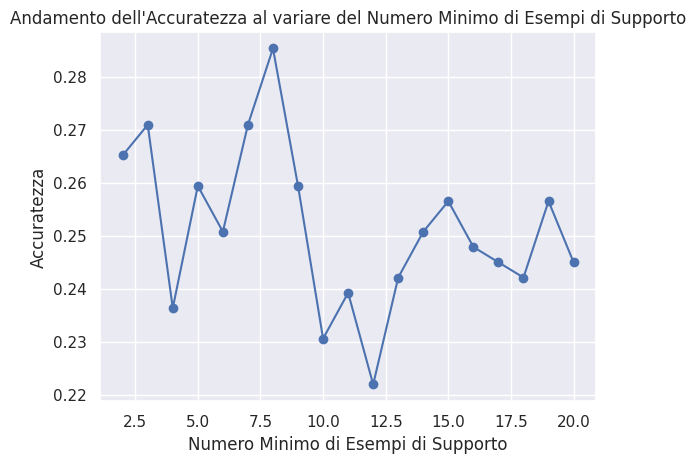

In [ ]:
plot_accuracy_vs_min_samples(X, y, np.arange(2,21))

I valori ottimizzati si ottengono con un numero minimo nelle foglie compreso tra 6 e 9.

### Ottimizzazione del'albero decisionale sui valori di fold per la cross validation

In [ ]:
# List of cv values to test
cv_values = [5, 10, 15, 20]

# Iterate over different cv values
for cv in cv_values:
    model3 = DecisionTreeClassifier(criterion='gini')
    scores3 = cross_val_score(model3, X, y, cv=cv)
    mean_accuracy3 = scores3.mean()
    print("CV:", cv)
    print("Mean Accuracy:", mean_accuracy3)
    print("Scores:", scores3)
    print("----------")

CV: 5
Mean Accuracy: 0.24476534296028882
Scores: [0.23826715 0.25270758 0.24548736 0.23465704 0.25270758]
----------
CV: 10
Mean Accuracy: 0.2577312063392764
Scores: [0.30935252 0.20863309 0.28057554 0.22302158 0.30935252 0.20289855
 0.2826087  0.24637681 0.25362319 0.26086957]
----------
CV: 15
Mean Accuracy: 0.24402368708119054
Scores: [0.29032258 0.2688172  0.1827957  0.20430108 0.30107527 0.20652174
 0.22826087 0.2826087  0.19565217 0.30434783 0.19565217 0.19565217
 0.25       0.20652174 0.34782609]
----------
CV: 20
Mean Accuracy: 0.24410973084886126
Scores: [0.24285714 0.21428571 0.28571429 0.2        0.18571429 0.27536232
 0.33333333 0.27536232 0.28985507 0.26086957 0.24637681 0.2173913
 0.26086957 0.36231884 0.17391304 0.2173913  0.2173913  0.1884058
 0.14492754 0.28985507]
----------


Passiamo alla massima ottimizzazione del parametro di cross-fold-validation  e plottiamo i risultati per capire quale sia il migliore.

In [ ]:
# Questo esperimento è stato condoto su un range con max 31, 100 e 300 non si è andato
# oltre poichè già con fold da 300 è diffile che ci siano
cv_range = range(2, 31)  # parametri da provare per la cross-val
mean_accuracies_list = [] # raccolta dei risultati

for cv in cv_range:
    model4 = DecisionTreeClassifier(criterion='gini')
    scores4 = cross_val_score(model4, X, y, cv=cv)
    mean_accuracy4 = scores4.mean()
    mean_accuracies_list.append(mean_accuracy4)
    print("CV:", cv)
    print("Mean Accuracy:", mean_accuracy4)
    print("Scores:", scores4)
    print("----------")

# Plotting the mean accuracies
plt.plot(cv_range, mean_accuracies_list)
plt.xticks(np.arange(0, 31, 5))
plt.xlabel('Number of folds (cv)')
plt.ylabel('Mean Accuracy')
plt.title('Cross-Validation Mean Accuracy')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, fbeta_score, precision_score, recall_score, roc_curve
decision_tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.18018018018018017


## Addestramento dell'albero sul data set iniziale per avere una baseline

In [ ]:
# Preparazione delle features e del target
X = df.drop('Baselinehistological staging', axis=1)
y = df['Baselinehistological staging']

# Divisione del dataset in dati di training e dati di test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Creazione del modello di albero decisionale
model = DecisionTreeClassifier()

# Addestramento del modello sui dati di training completi
model.fit(X_train, y_train)

# Applicazione della cross-validation con 10 fold sui dati di training
scores = cross_val_score(model, X_train, y_train, cv=10)

# Calcolo della media delle performance ottenute
mean_accuracy = scores.mean()

# Valutazione del modello sui dati di test
test_accuracy = model.score(X_test, y_test)

# Stampa delle performance
print("Accuracy media (cross-validation):", mean_accuracy)
print("Accuracy sui dati di test:", test_accuracy)

Accuracy media (cross-validation): 0.2418427518427518
Accuracy sui dati di test: 0.21299638989169675


dopo i pessimi risultati ottenuti vogliamo capire che cosa avrebbe fatto un modello che banalmente avrebbe sempre predetto la classe più frequente del data set


In [ ]:
# Prepazione del target
y_t = df['Baselinehistological staging']

# Calcolo della classe media del target
y_p = [4] * len(y_t)

# Calcolo dell'accuratezza
acc = accuracy_score(y_t, y_p)

# Stampa dell'accuratezza
print("Accuracy:", acc)

Accuracy: 0.26137184115523465


conclusione ad oggi il modello è pessimo!!!!!!